#### Things I've Cleaned
 - Extra column and row on rankings
 - Dropped ages column cuz we have birth years
 - Fixed impossible birth years
 - Took suffixes of heights and converted to floats
 
 - NOTE: There are youth people. This is something that might be tricky
 - NOTE: We might want the names of the events

#### Things We Might Want
 - We should go in here and make sure the country codes all map to something
 - We might want a smaller dataset that just has the athletes with the most data and stuff

In [2]:
import json

import numpy as np
import pandas as pd
from toolz.curried import *
import missingno
from matplotlib import pyplot as plt

In [3]:
def load_ranking_df():
    filename = '../data/rankings.csv'
    ranking_df = pd.read_csv(filename)
    clean_rankings = ranking_df.drop(columns=['Unnamed: 0'])
    clean_rankings = clean_rankings.drop(0)
    return clean_rankings

def load_athlete_df():
    # When loading, you may want to change the years to ints (future porter: I don't know why I put this here...)
    filename = '../data/athlete_data.csv'
    athlete_df = pd.read_csv(filename)
    clean_athletes = athlete_df.set_index('id')
    clean_athletes.index = clean_athletes.index.rename('ID')
    clean_athletes = clean_athletes.drop(columns='age')

    bad_ages_mask = ~clean_athletes['birth_year'].isin(np.arange(1990-80, 2020-3))
    bad_ages = clean_athletes[bad_ages_mask]['birth_year'].unique()
    bad_ages = bad_ages[1:] # Take the nan out
    clean_athletes.loc[clean_athletes['birth_year'].isin(bad_ages)] = np.nan

    clean_athletes['height'] = clean_athletes['height'].str.slice(0,-3)
    clean_athletes['height'] = clean_athletes['height'].astype(float)
    clean_athletes['weight'] = clean_athletes['weight'].str.slice(0,-2)
    clean_athletes['weight'] = clean_athletes['weight'].astype(float)
    clean_athletes = clean_athletes.rename({'first_name': 'First Name', 'last_name': 'Last Name'}, axis=1)
    
    # Get rid of really short and light athletes (probably kids)
#     clean_athletes.loc[clean_athletes['height'] < 100] = np.nan
#     clean_athletes.loc[clean_athletes['weight'] < 20] = np.nan
    
    return clean_athletes

events = None

def load_event_df():
    if not events:
        with open('../data/athlete_comps.json') as f:
            data = json.loads(f.read())
            athlete_comp_result = {athlete_id: merge(*[{comp['comp']: comp['result']} for comp in comps]) for athlete_id, comps in data.items()}
            event_df = pd.read_json(json.dumps(athlete_comp_result), orient='index')
        return event_df
    return events

In [21]:
# Remove Athletes not in Rankings
athletes = load_athlete_df()
clean_rankings = load_ranking_df()

ranked_athlete_ids = clean_rankings['ID'].unique()
ranked_athletes = athletes.loc[athletes.index.isin(ranked_athlete_ids)]

print(ranked_athletes['country'].unique())
print(ranked_athletes['weight'].unique())
print(ranked_athletes['height'].unique())
print(ranked_athletes['birth_year'].unique())
print(ranked_athletes.describe())

ranked_athletes

['GER' 'USA' 'RUS' 'JPN' 'FRA' 'ESP' 'ITA' 'GBR' 'HKG' 'KOR' 'NED' 'SLO'
 'SUI' 'UKR' 'BEL' 'AUT' 'HUN' 'AUS' 'SVK' 'BUL' 'CZE' 'FIN' 'KAZ' 'POL'
 'CRO' 'GEO' 'SWE' 'NOR' 'INA' 'CAN' 'BRA' 'SGP' 'VEN' 'MKD' 'GRE' 'COL'
 'CHI' 'CHN' 'THA' 'IRI' 'ECU' 'SRB' 'RSA' 'JOR' 'IND' 'LIB' 'IRQ' 'DEN'
 'AZE' 'LAT' 'TUR' 'TPE' 'ROU' 'LUX' 'ISR' 'NZL' 'ARG' 'MGL' 'PAK' 'MAS'
 'PHI' 'MEX' 'LTU' 'IRL' 'NEP' 'POR' 'BLR']
[nan 77. 55. 64. 60. 57. 54. 45. 48. 59. 65. 56. 62. 70. 58. 73. 52. 69.
 63. 66. 53. 61. 67. 72. 68. 51. 50. 49. 46. 79. 76. 47. 41. 42. 35. 43.
 44. 75. 81. 78. 71.]
[ nan 184. 170. 178. 175. 172. 160. 166. 157. 171. 167. 169. 173. 176.
 182. 174. 180. 179. 185. 177. 186. 165. 168. 164. 183. 161. 189. 188.
 163. 190. 181. 158. 151. 154. 162. 148. 153. 155. 152. 159. 140. 156.
 150. 145.]
[1998. 1999. 1991. 1995. 2002. 2003. 2001. 1984. 1973.   nan 1974. 1968.
 1970. 1976. 1969. 1975. 1965. 1967. 1981. 1958. 1977. 1961. 1980. 1964.
 1971. 1966. 1978. 1992. 1962. 1972. 1963. 1956. 198

,First Name,Last Name,country,birth_year,height,weight
ID,,,,,,
51120,Sophie,Rauberger,GER,1998.0,NaN,NaN
51759,Johanna,Holfeld,GER,1999.0,NaN,NaN
70578,Matt,Fultz,USA,1991.0,NaN,NaN
70962,Tagir,Izmailov,RUS,1995.0,NaN,NaN
73438,Thea,Wulff,USA,2002.0,NaN,NaN
...,...,...,...,...,...,...
61376,Taisei,Homma,JPN,1999.0,NaN,NaN
61380,Miu,Kurita,JPN,2002.0,NaN,NaN
61433,JinXin,Li,CHN,2001.0,NaN,NaN


      ID  Rank Last Name First Name  Points Event Gender  Year country  \
0   8372     1     Ondra       Adam   300.0  lead    MEN  2019     CZE   
2   8372    31     Ondra       Adam    55.0  lead    MEN  2018     CZE   
3   8372    28     Ondra       Adam    80.0  lead    MEN  2017     CZE   
4   8372    24     Ondra       Adam    51.0  lead    MEN  2016     CZE   
5   8372     1     Ondra       Adam   458.0  lead    MEN  2015     CZE   
7   8372     3     Ondra       Adam   428.0  lead    MEN  2014     CZE   
9   8372    11     Ondra       Adam   180.0  lead    MEN  2013     CZE   
10  8372    58     Ondra       Adam    18.0  lead    MEN  2011     CZE   
11  8372     3     Ondra       Adam   340.0  lead    MEN  2010     CZE   
13  8372     1     Ondra       Adam   451.0  lead    MEN  2009     CZE   

    birth_year  height  weight   age  
0       1993.0   185.0    67.0  26.0  
2       1993.0   185.0    67.0  25.0  
3       1993.0   185.0    67.0  24.0  
4       1993.0   185.0    67.

,ID,Rank,Last Name,First Name,Points,Event,Gender,Year,country,birth_year,height,weight,age
0,8372,1,Ondra,Adam,300.0,lead,MEN,2019,CZE,1993.0,185.0,67.0,26.0
1,8372,2,Ondra,Adam,335.0,boulder,MEN,2019,CZE,1993.0,185.0,67.0,26.0
2,8372,31,Ondra,Adam,55.0,lead,MEN,2018,CZE,1993.0,185.0,67.0,25.0
3,8372,28,Ondra,Adam,80.0,lead,MEN,2017,CZE,1993.0,185.0,67.0,24.0
4,8372,24,Ondra,Adam,51.0,lead,MEN,2016,CZE,1993.0,185.0,67.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,1095,75,Koliada,Elena,3.0,lead,WOMEN,1991,RUS,NaN,NaN,NaN,NaN
8273,1349,76,Likhova,Svetlana,3.0,lead,WOMEN,1991,RUS,NaN,NaN,NaN,NaN
8274,1081,77,Russell,Diane,3.0,lead,WOMEN,1991,USA,NaN,NaN,NaN,NaN
8275,1152,78,Cadova,Ivana,2.0,lead,WOMEN,1991,CZE,NaN,NaN,NaN,NaN


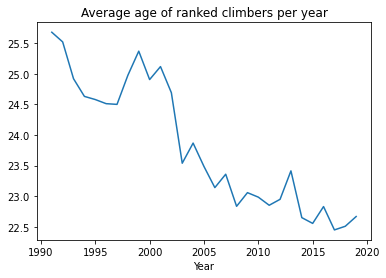

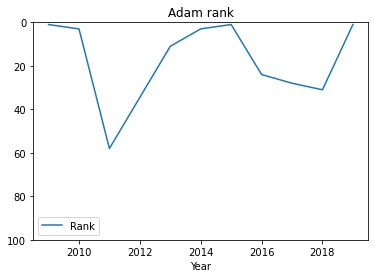

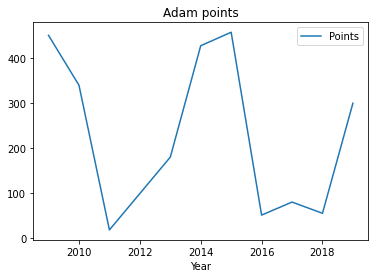

In [25]:
# Merge athletes and rankings
merged = clean_rankings.merge(athletes, on=['ID', 'First Name', 'Last Name'])
merged['age'] = merged['Year'] - merged['birth_year']
merged.groupby('Year')['age'].mean().plot()
plt.title('Average age of ranked climbers per year')
# women = merged[merged['Gender']]
# merged.gropuby(['Year', 'Gender'])['age'].mean().plot()

adam = merged[merged['ID'] == 8372]
print(adam[adam['Event'] == 'lead'])
adam[adam['Event'] == 'lead'].plot('Year', 'Rank', title='Adam rank', ylim=(100, 0))
adam[adam['Event'] == 'lead'].plot('Year', 'Points', title='Adam points')

# janja = merged[merged['ID'] == 11989]
# janja[janja['Event'] == 'lead'].plot('Year', 'Rank')
# janja[janja['Event'] == 'boulder'].plot('Year', 'Rank')

# Find firsts
# for event in ['lead', 'boulder', 'speed']:
#     for gender in ['Male', 'Female']:
#         first = merged[merged['Event'] == event]
#         first = merged[merged['Gender'] == gender]
#         first = first[first['Rank'] == 1]
#         first.sort_values('Year').plot('Year', 'age')
#         plt.title(f'{event.capitalize()} - {gender}')
#         plt.ylabel('Age')

merged

In [26]:
dataframes = {}
for event in ['lead', 'boulder', 'speed']:
    for gender in ['MEN', 'WOMEN']:
        filtered = clean_rankings[clean_rankings['Event'] == event]
        filtered = filtered[filtered['Gender'] == gender]
        filtered = filtered.pivot_table(values='Rank', index='ID', columns='Year')
        dataframes[f'{event}_{gender.lower()}'] = athletes.merge(filtered, on='ID')

lead_men = dataframes['lead_men']
# lead_men[lead_men.index == 8372]
lead_men

/Users/porter7678/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,First Name,Last Name,country,birth_year,height,weight,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
ID,,,,,,,,,,,,,,,,,,,,,
8,Andreas,Bindhammer,GER,1973.0,170.0,55.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Andreas,Hofmann,GER,NaN,NaN,NaN,NaN,58.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Bernabe,Fernandez,ESP,1974.0,178.0,64.0,NaN,NaN,60.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Bernardino,Lagni,ITA,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Cristian,Brenna,ITA,1970.0,175.0,60.0,NaN,64.0,22.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,Eric,Lopez Mateos,ESP,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6987,Mario,Lechner,AUT,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,10.0,9.0,13.0,13.0,24.0,23.0,NaN,NaN,NaN
61144,Dohyun,Lee,KOR,2002.0,166.0,46.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
